# 概要

アノテーションデータセットを確認する。

In [1]:
%config Completer.use_jedi = False

In [2]:
from chainercv.chainer_experimental.datasets.sliceable import TupleDataset
from chainercv.visualizations import vis_bbox

from src.preprocessor import ChocoPreProcessor

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
c_list = sns.color_palette().as_hex()
color_num = len(c_list)

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
IMG_DIR = "../data/res_images"
BBOX_DIR = "../data/res_images"
CLASSES_FILE = "../data/classes.txt"

In [6]:
choco_prep = ChocoPreProcessor()
choco_prep.set_classes(class_file=CLASSES_FILE)

{'choco-ball': 0, 'choco-package': 1}

In [7]:
_ = choco_prep.set_dataset(anno_dir=BBOX_DIR, img_dir=IMG_DIR)
bboxs = choco_prep.get_bbox_list()
imgs = choco_prep.get_img_array()
obj_ids = choco_prep.get_object_ids_list()
classes = choco_prep.get_object_classes()

100%|██████████| 33/33 [00:00<00:00, 217.04it/s]


In [8]:
dataset = TupleDataset(('img', imgs), ('bbox', bboxs), ('label', obj_ids))

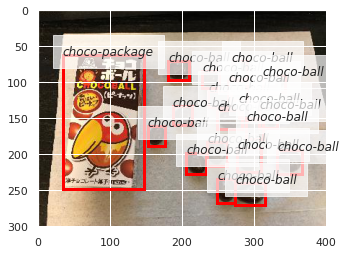

In [9]:
tmp_img, tmp_bboxs, tmp_labels = dataset[1]
vis_bbox(tmp_img, tmp_bboxs, tmp_labels, label_names=classes)
plt.show()